In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run load_data.py

/home/zhampel/py-venv/python3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Load an image and get its label
img_id = 10
#head_dir='/Users/zhampel/insight/project/data/mnist/pngs'
head_dir='/home/zhampel/insight/data/mnist/pngs'
filepath=head_dir+'/training/0/17095.png'
img, img_shape = load_single_image(filepath)
print(img_shape)

(28, 28)


# Test generator function

In [4]:
batch_size=128
filepath='/home/zhampel/insight/data/mnist/pngs'
trainpath=filepath+'/training/'
train_gen, valid_gen = train_img_generator(path_to_data=trainpath, \
                                           target_size=(28, 28), \
                                           batch_size=batch_size, \
                                           val_split=0.2)

Found 48004 images belonging to 10 classes.
Found 11996 images belonging to 10 classes.


In [5]:
testpath=filepath+'/testing/'
test_gen = test_img_generator(path_to_data=testpath, \
                              target_size=(28, 28), \
                              batch_size=batch_size)
print(test_gen.num_classes)

Found 10000 images belonging to 10 classes.
10


In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671)
np.set_printoptions(threshold='nan')

In [9]:
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential

In [10]:
# Specifics
batch_size = 128
epochs = 10

class History(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [14]:
#img, label = load_img(filepath, img_id=10, file_type='png')
test_image_path = '/home/zhampel/insight/data/mnist/pngs/training/0/17095.png'
img, img_shape = load_single_image(test_image_path)
input_shape = (img.shape[0], img.shape[1], 3)
num_classes = train_gen.num_classes
# History
history = History()
# Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
#trainpath=head_dir+'/training/'
#train_gen = img_generator(trainpath, batch_size=batch_size, n_classes=num_classes, samples=[0, 50000])

#valpath=head_dir+'/training/'
#valid_gen = img_generator(valpath, batch_size=batch_size, n_classes=num_classes, samples=[50000, 60000])

#testpath=head_dir+'/testing/'
#test_gen = img_generator(testpath, batch_size=batch_size, n_classes=num_classes, samples=[0,20000])

In [16]:
# Run the training
model.fit_generator(train_gen,
                    steps_per_epoch=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_gen,
                    validation_steps=10,
                    class_weight=None,
                    callbacks=[history])

Epoch 1/10
128/128 [==============================] - 4s 30ms/step - loss: 0.3075 - acc: 0.9089 - val_loss: 0.0794 - val_acc: 0.9734
Epoch 2/10
128/128 [==============================] - 3s 21ms/step - loss: 0.0836 - acc: 0.9747 - val_loss: 0.0509 - val_acc: 0.9852
Epoch 3/10
128/128 [==============================] - 3s 22ms/step - loss: 0.0615 - acc: 0.9799 - val_loss: 0.0573 - val_acc: 0.9820
Epoch 4/10
128/128 [==============================] - 3s 21ms/step - loss: 0.0431 - acc: 0.9871 - val_loss: 0.0512 - val_acc: 0.9883
Epoch 5/10
128/128 [==============================] - 3s 21ms/step - loss: 0.0437 - acc: 0.9864 - val_loss: 0.0346 - val_acc: 0.9906
Epoch 6/10
128/128 [==============================] - 3s 21ms/step - loss: 0.0338 - acc: 0.9882 - val_loss: 0.0411 - val_acc: 0.9875
Epoch 7/10
128/128 [==============================] - 3s 20ms/step - loss: 0.0280 - acc: 0.9908 - val_loss: 0.0318 - val_acc: 0.9883
Epoch 8/10
128/128 [==============================] - 3s 21ms/step - 

In [17]:
# Evaluate score
score = model.evaluate_generator(test_gen, steps=1, max_queue_size=10)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

Test score: 0.011446002870798111
Test accuracy: 0.9921875


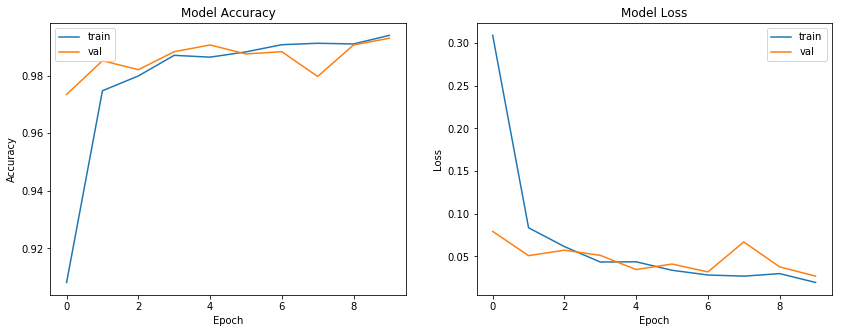

In [18]:
# Summarize history
f = plt.figure(figsize=(14,5))

# Summarize accuracy history
plt.subplot(1,2,1)
plt.plot(history.acc)
plt.plot(history.val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
# Summarize loss history
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.show()